In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

In [2]:
# Loading data
from google.colab import drive
drive.mount('/content/drive')
df_cars = pd.read_csv("/content/drive/MyDrive/original_label_encoded (1).csv")
df_cars.head()

Mounted at /content/drive


,Unnamed: 0,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
0,0,0,0,0,0,0,0,0,0,0,0,21500.0
1,1,0,0,0,0,0,1,0,1,0,1,21500.0
2,2,1,1,1,0,1,0,1,2,1,2,30000.0
3,3,2,2,1,0,0,0,2,3,2,3,27750.0
4,4,1,3,1,0,1,0,3,4,2,4,67000.0


In [3]:
df_cars.dtypes

Unnamed: 0        int64
make              int64
model             int64
body              int64
state             int64
color             int64
interior          int64
condition         int64
odometer          int64
car_age           int64
mmr               int64
sellingprice    float64
dtype: object

In [4]:
# Define features set
X = df_cars[['model', 'body', 'interior', 'condition', 'odometer', 'car_age', 'mmr']]
# Define target variable
y = df_cars['sellingprice']
X.head()

,model,body,interior,condition,odometer,car_age,mmr
0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1
2,1,1,0,1,2,1,2
3,2,1,0,2,3,2,3
4,3,1,0,3,4,2,4


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

In [6]:
# Creating StandardScaler instance(not needed for tree based models)
#scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [8]:
X_train = X_train[:500000]
y_train = y_train[:500000]

In [9]:
#FITTING RANDOM FOREST MODEL

In [10]:

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=14, random_state=0
                                  , max_depth=2000, max_features='log2', max_leaf_nodes=7000)


In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 40401382.368641645
Mean Absolute Error: 3347.7335729834567
R-squared: 0.5685077576987881


In [14]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
#cm_df = pd.DataFrame(
    #cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print("Confusion Matrix:")
print(cm)
print("\nAccuracy Score:", acc_score)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Accuracy Score: 0.024929026293845198


In [15]:
# Displaying results
print("Confusion Matrix")
display(cm)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Accuracy Score : 0.024929026293845198
Classification Report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
       100.0       0.00      0.00      0.00        12
       150.0       0.00      0.00      0.00        14
       175.0       0.00      0.00      0.00         6
       200.0       0.00      0.00      0.00       102
       225.0       0.00      0.00      0.00        44
       250.0       0.00      0.00      0.00       142
       275.0       0.00      0.00      0.00        63
       300.0       0.12      0.21      0.15       650
       325.0       0.07      0.02      0.03       105
       350.0       0.05      0.03      0.04       357
       375.0       0.00      0.00      0.00        63
       385.0       0.00      0.00      0.00         0
       400.0       0.10      0.18      0.13       782
       420.0       0.00      0.00      0.00         1
       425.0       0.00      0.00      0.00        49
       450.0       0.02      0.01      0.01       238
       475.0       0.00    

In [16]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[(0.2430183225798599, 'mmr'),
 (0.21926738289136843, 'odometer'),
 (0.16750082212507186, 'model'),
 (0.1335006288505454, 'condition'),
 (0.09207049745641657, 'car_age'),
 (0.08182550954657831, 'body'),
 (0.06281683655015953, 'interior')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

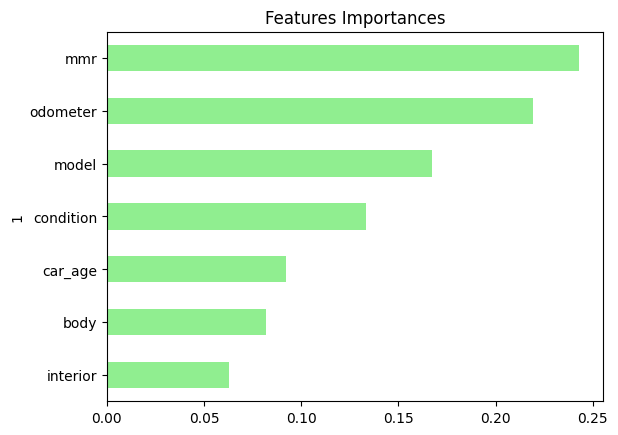

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)